In [156]:
import requests as rq
import numpy as np

In [157]:
topo_json = rq.get('http://0.0.0.0:8080/topology_graph')
topo_graph = topo_json.json()
topo_graph

{'directed': True,
 'multigraph': False,
 'graph': {},
 'nodes': [{'id': 1}, {'id': 2}, {'id': 3}],
 'links': [{'weight': 0,
   'delay': 0,
   'packet_loss': 0,
   'source': 1,
   'target': 1},
  {'weight': 1,
   'lldpdelay': 0.0021190643310546875,
   'delay': 0.0029448270797729492,
   'source': 1,
   'target': 2},
  {'weight': 0, 'delay': 0, 'packet_loss': 0, 'source': 2, 'target': 2},
  {'weight': 1,
   'lldpdelay': 0.0021135807037353516,
   'delay': 0.0029448270797729492,
   'source': 2,
   'target': 1},
  {'weight': 1,
   'lldpdelay': 0.0020296573638916016,
   'delay': 0.002719402313232422,
   'source': 2,
   'target': 3},
  {'weight': 0, 'delay': 0, 'packet_loss': 0, 'source': 3, 'target': 3},
  {'weight': 1,
   'lldpdelay': 0.0022530555725097656,
   'delay': 0.002719402313232422,
   'source': 3,
   'target': 2}]}

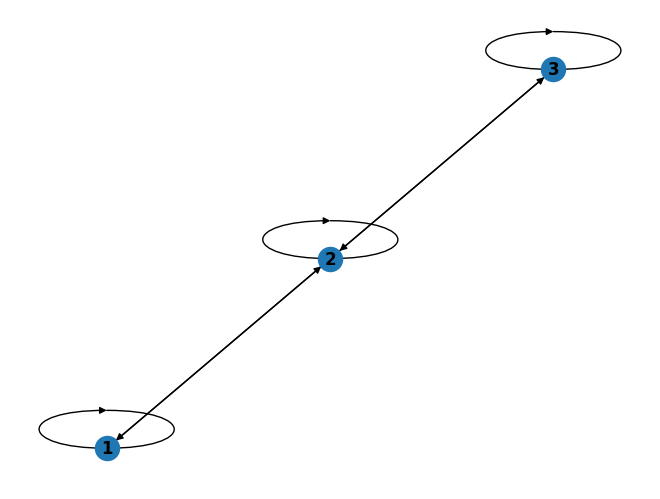

In [158]:
import networkx as nx
# json to networkx object
graph = nx.json_graph.node_link_graph(topo_graph)
# plot graph
import matplotlib.pyplot as plt
nx.draw(graph, with_labels=True, font_weight='bold')
plt.show()

In [159]:
switch_json = rq.get('http://0.0.0.0:8080/switches').json()
switch_json

{'switch': [{'dpid': '0000000000000001',
   'ports': [{'dpid': '0000000000000001',
     'port_no': '00000001',
     'hw_addr': 'be:75:7e:fd:e4:e9',
     'name': 's1-eth1'},
    {'dpid': '0000000000000001',
     'port_no': '00000002',
     'hw_addr': '9a:a3:94:eb:e8:7e',
     'name': 's1-eth2'}]},
  {'dpid': '0000000000000002',
   'ports': [{'dpid': '0000000000000002',
     'port_no': '00000001',
     'hw_addr': '7a:ab:2f:29:7a:15',
     'name': 's2-eth1'},
    {'dpid': '0000000000000002',
     'port_no': '00000002',
     'hw_addr': '46:5f:97:ef:b1:da',
     'name': 's2-eth2'},
    {'dpid': '0000000000000002',
     'port_no': '00000003',
     'hw_addr': '9e:da:09:2a:5e:cb',
     'name': 's2-eth3'}]},
  {'dpid': '0000000000000003',
   'ports': [{'dpid': '0000000000000003',
     'port_no': '00000001',
     'hw_addr': 'e2:8c:75:3a:d4:fc',
     'name': 's3-eth1'},
    {'dpid': '0000000000000003',
     'port_no': '00000002',
     'hw_addr': '62:8c:c1:c2:55:41',
     'name': 's3-eth2'}]}]}

In [160]:
host_json = rq.get('http://0.0.0.0:8080/hosts').json()
host_json

{'hosts': [{'mac': '00:00:00:00:00:01',
   'ipv4': ['10.0.0.1'],
   'ipv6': [],
   'port': {'dpid': '0000000000000001',
    'port_no': '00000001',
    'hw_addr': 'be:75:7e:fd:e4:e9',
    'name': 's1-eth1'}},
  {'mac': '00:00:00:00:00:02',
   'ipv4': ['10.0.0.2'],
   'ipv6': [],
   'port': {'dpid': '0000000000000002',
    'port_no': '00000001',
    'hw_addr': '7a:ab:2f:29:7a:15',
    'name': 's2-eth1'}},
  {'mac': '00:00:00:00:00:03',
   'ipv4': ['10.0.0.3'],
   'ipv6': [],
   'port': {'dpid': '0000000000000003',
    'port_no': '00000001',
    'hw_addr': 'e2:8c:75:3a:d4:fc',
    'name': 's3-eth1'}}]}

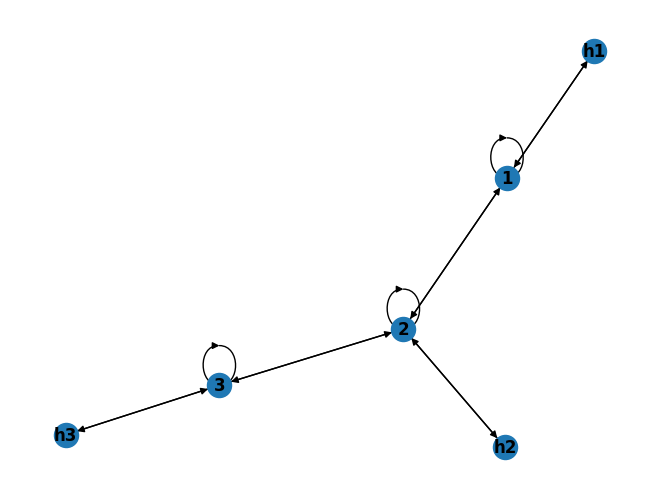

In [161]:
graph2 = graph.copy()
for host in host_json['hosts']:
    host_id = int(host['mac'].translate(str.maketrans('','',":.- ")), 16)
    graph2.add_node(f'h{host_id}', type='host')
    # add bi-directional link between host and switch
    graph2.add_edge(f'h{host_id}', int(host['port']['dpid']), type='host')
    graph2.add_edge(int(host['port']['dpid']), f'h{host_id}', type='host')


nx.draw(graph2, with_labels=True, font_weight='bold')
plt.show()

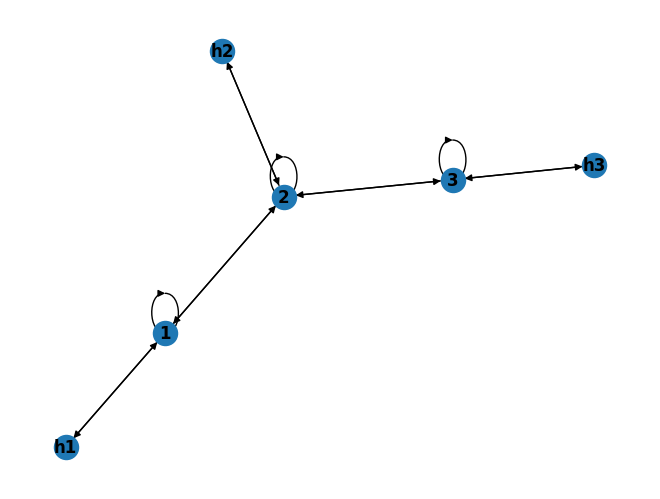

<class 'numpy.ndarray'>
[[], [2, 4], [1, 3, 5], [2, 6], [1], [2], [3]]
{1: 1, 2: 2, 3: 3, 'h1': 4, 'h2': 5, 'h3': 6}


In [162]:
mapping = dict(zip(graph2.nodes(), range(1, len(graph2.nodes())+1)))
nx.draw(graph2, with_labels=True, font_weight='bold')
plt.show()
# number of nodes
number_node = len(graph2.nodes())
bin_matrix = nx.adjacency_matrix(graph2).todense()
print(type(bin_matrix))
adj_matrix = [[] for i in range(number_node+1)]
for i in range(1, number_node+1):
    for j in range(1, number_node+1):
        if bin_matrix[i-1][j-1] == 1:
            adj_matrix[i].append(j)

print(adj_matrix)
print(mapping)



In [163]:
# graph2 to json
graph2_json = nx.json_graph.node_link_data(graph2)
graph2_json

{'directed': True,
 'multigraph': False,
 'graph': {},
 'nodes': [{'id': 1},
  {'id': 2},
  {'id': 3},
  {'type': 'host', 'id': 'h1'},
  {'type': 'host', 'id': 'h2'},
  {'type': 'host', 'id': 'h3'}],
 'links': [{'weight': 0,
   'delay': 0,
   'packet_loss': 0,
   'source': 1,
   'target': 1},
  {'weight': 1,
   'lldpdelay': 0.0021190643310546875,
   'delay': 0.0029448270797729492,
   'source': 1,
   'target': 2},
  {'type': 'host', 'source': 1, 'target': 'h1'},
  {'weight': 0, 'delay': 0, 'packet_loss': 0, 'source': 2, 'target': 2},
  {'weight': 1,
   'lldpdelay': 0.0021135807037353516,
   'delay': 0.0029448270797729492,
   'source': 2,
   'target': 1},
  {'weight': 1,
   'lldpdelay': 0.0020296573638916016,
   'delay': 0.002719402313232422,
   'source': 2,
   'target': 3},
  {'type': 'host', 'source': 2, 'target': 'h2'},
  {'weight': 0, 'delay': 0, 'packet_loss': 0, 'source': 3, 'target': 3},
  {'weight': 1,
   'lldpdelay': 0.0022530555725097656,
   'delay': 0.002719402313232422,
   's

In [164]:
host_json

{'hosts': [{'mac': '00:00:00:00:00:01',
   'ipv4': ['10.0.0.1'],
   'ipv6': [],
   'port': {'dpid': '0000000000000001',
    'port_no': '00000001',
    'hw_addr': 'be:75:7e:fd:e4:e9',
    'name': 's1-eth1'}},
  {'mac': '00:00:00:00:00:02',
   'ipv4': ['10.0.0.2'],
   'ipv6': [],
   'port': {'dpid': '0000000000000002',
    'port_no': '00000001',
    'hw_addr': '7a:ab:2f:29:7a:15',
    'name': 's2-eth1'}},
  {'mac': '00:00:00:00:00:03',
   'ipv4': ['10.0.0.3'],
   'ipv6': [],
   'port': {'dpid': '0000000000000003',
    'port_no': '00000001',
    'hw_addr': 'e2:8c:75:3a:d4:fc',
    'name': 's3-eth1'}}]}

In [165]:
# example of flowrule json
{
    "dpid": 2,
    "cookie": 1,
    "cookie_mask": 1,
    "table_id": 0,
    "idle_timeout": 3000,
    "hard_timeout": 3000,
    "priority": 1,
    "flags": 1,
    "match": {
        "in_port": 1,                   # in port of switch
        "dl_src": "00:00:00:00:00:01",  # mac of src host
        "dl_dst": "00:00:00:00:00:02"   # mac of dst host
        },
        "actions":[{
            "type":"OUTPUT","port": 3   # out port of switch
            }]
}

{'dpid': 2,
 'cookie': 1,
 'cookie_mask': 1,
 'table_id': 0,
 'idle_timeout': 3000,
 'hard_timeout': 3000,
 'priority': 1,
 'flags': 1,
 'match': {'in_port': 1,
  'dl_src': '00:00:00:00:00:01',
  'dl_dst': '00:00:00:00:00:02'},
 'actions': [{'type': 'OUTPUT', 'port': 3}]}

In [166]:
# {1: 1, 2: 2, 3: 3, 'h3': 4, 'h1': 5, 'h2': 6}
solution = [('h3', 'h1', ['h3', 3, 2, 1, 'h1']), ('h2', 'h3', ['h2', 2, 3, 'h3']), ('h1', 'h2', ['h1', 1, 2, 'h2'])]
solutions = {'path': [
    {
        'src_host': 3,
        'dst_host': 1,
        'path_dpid': [3, 2, 1],
    },
    {
        'src_host': 2,
        'dst_host': 3,
        'path_dpid': [2, 3],
    },
    {
        'src_host': 1,
        'dst_host': 2,
        'path_dpid': [1, 2],
    }
]}

link_to_port = rq.get('http://0.0.0.0:8080/link_to_port').json()
def convert_strkey_to_intkey(dic):
    """
        Convert key from string to int
    """
    return {int(key): {int(key2): value2 for key2, value2 in value.items()} for key, value in dic.items()}
link_to_port = convert_strkey_to_intkey(link_to_port)
link_to_port

{1: {2: [2, 2]}, 3: {2: [2, 3]}, 2: {1: [2, 2], 3: [3, 2]}}

In [167]:
path_dpid = [1,2,3,4,5]
# make b is a list of tuple of a is a combination of a with 2 adjacent elements include reverse order right after
b = [(path_dpid[i], path_dpid[i+1]) for i in range(len(path_dpid)-1)] + [(path_dpid[i+1], path_dpid[i]) for i in range(len(path_dpid)-1)]
# split b into haft
c, d = b[:len(b)//2], b[len(b)//2:]
c, d


([(1, 2), (2, 3), (3, 4), (4, 5)], [(2, 1), (3, 2), (4, 3), (5, 4)])

In [168]:
def flowrule_template(dpid, in_port, out_port, hostmac_src, hostmac_dst):
    return {
        "dpid": dpid,
        "cookie": 1,
        "cookie_mask": 1,
        "table_id": 0,
        "idle_timeout": 3000,
        "hard_timeout": 3000,
        "priority": 1,
        "flags": 1,
        "match": {
            "in_port": in_port,
            "dl_dst": hostmac_src,
            "dl_src": hostmac_dst,
            "actions":[{
                "type":"OUTPUT","port": out_port,
            }]
        }
    }

In [169]:
def hostid_to_mac(host_id):
    mac_hex = "{:012x}".format(host_id)
    mac_str = ":".join(mac_hex[i:i+2] for i in range(0, len(mac_hex), 2))
    return mac_str

def get_endpoint_info(host_mac, host_json):
    '''
        Get dpid and port_no of host connected to switch
        assume that host only connect to 1 switch
    '''
    for host in host_json['hosts']:
        if host['mac'] == host_mac:
            return int(host['port']['dpid']), int(host['port']['port_no'])

In [170]:
solution = solutions['path'][0]
path_dpid = solution['path_dpid']

hostmac_src = hostid_to_mac(solution['src_host'])
hostmac_dst = hostid_to_mac(solution['dst_host'])

src_endpoint_dpid, src_endpoint_port = get_endpoint_info(hostmac_src, host_json)
dst_endpoint_dpid, dst_endpoint_port = get_endpoint_info(hostmac_dst, host_json)


# flowrules = []
dpid_flowport = {}
for i in range(len(path_dpid)-1):
    if i == 0:
        in_port = src_endpoint_port
        out_port = link_to_port[path_dpid[i]][path_dpid[i+1]][0]
        dpid_flowport[path_dpid[i]] = (in_port, out_port)
        continue
    in_port = link_to_port[path_dpid[i-1]][path_dpid[i]][1]
    out_port = link_to_port[path_dpid[i]][path_dpid[i+1]][0]
    dpid_flowport[path_dpid[i]] = (in_port, out_port)

# in_port = link_to_port[path_dpid[-2]][path_dpid[-1]][1]
in_port = link_to_port[path_dpid[-1]][path_dpid[-2]][0]
out_port = dst_endpoint_port
dpid_flowport[path_dpid[-1]] = (in_port, out_port)


# flowrules.append(flowrule_template(path_dpid[-1], in_port, out_port, hostmac_src, hostmac_dst))
# flowrules

dpid_flowport

{3: (1, 2), 2: (3, 2), 1: (2, 1)}

In [171]:
flowrules = []
for dpid, flowport in dpid_flowport.items():
    flowrules.append(flowrule_template(dpid, flowport[0], flowport[1], hostmac_src, hostmac_dst))
    flowrules.append(flowrule_template(dpid, flowport[1], flowport[0], hostmac_dst, hostmac_src))
flowrules

[{'dpid': 3,
  'cookie': 1,
  'cookie_mask': 1,
  'table_id': 0,
  'idle_timeout': 3000,
  'hard_timeout': 3000,
  'priority': 1,
  'flags': 1,
  'match': {'in_port': 1,
   'dl_dst': '00:00:00:00:00:03',
   'dl_src': '00:00:00:00:00:01',
   'actions': [{'type': 'OUTPUT', 'port': 2}]}},
 {'dpid': 3,
  'cookie': 1,
  'cookie_mask': 1,
  'table_id': 0,
  'idle_timeout': 3000,
  'hard_timeout': 3000,
  'priority': 1,
  'flags': 1,
  'match': {'in_port': 2,
   'dl_dst': '00:00:00:00:00:01',
   'dl_src': '00:00:00:00:00:03',
   'actions': [{'type': 'OUTPUT', 'port': 1}]}},
 {'dpid': 2,
  'cookie': 1,
  'cookie_mask': 1,
  'table_id': 0,
  'idle_timeout': 3000,
  'hard_timeout': 3000,
  'priority': 1,
  'flags': 1,
  'match': {'in_port': 3,
   'dl_dst': '00:00:00:00:00:03',
   'dl_src': '00:00:00:00:00:01',
   'actions': [{'type': 'OUTPUT', 'port': 2}]}},
 {'dpid': 2,
  'cookie': 1,
  'cookie_mask': 1,
  'table_id': 0,
  'idle_timeout': 3000,
  'hard_timeout': 3000,
  'priority': 1,
  'flags'

In [172]:
def create_flowrule_json(solution, host_json, link_to_port):
    solution = solution['path'][0]
    path_dpid = solution['path_dpid']

    hostmac_src = hostid_to_mac(solution['src_host'])
    hostmac_dst = hostid_to_mac(solution['dst_host'])

    src_endpoint_dpid, src_endpoint_port = get_endpoint_info(hostmac_src, host_json)
    dst_endpoint_dpid, dst_endpoint_port = get_endpoint_info(hostmac_dst, host_json)

    dpid_flowport = {}
    for i in range(len(path_dpid)-1):
        # find in_port and out_port of first switch
        if i == 0:
            in_port = src_endpoint_port
            out_port = link_to_port[path_dpid[i]][path_dpid[i+1]][0]
            dpid_flowport[path_dpid[i]] = (in_port, out_port)
            continue
        # find in_port and out_port of switch inbetween
        in_port = link_to_port[path_dpid[i-1]][path_dpid[i]][1]
        out_port = link_to_port[path_dpid[i]][path_dpid[i+1]][0]
        dpid_flowport[path_dpid[i]] = (in_port, out_port)

    # find in_port and out_port of last switch
    in_port = link_to_port[path_dpid[-1]][path_dpid[-2]][0]
    out_port = dst_endpoint_port
    dpid_flowport[path_dpid[-1]] = (in_port, out_port)

    # create bi-directional flowrule
    flowrules = []
    for dpid, flowport in dpid_flowport.items():
        flowrules.append(flowrule_template(dpid, flowport[0], flowport[1], hostmac_src, hostmac_dst))
        flowrules.append(flowrule_template(dpid, flowport[1], flowport[0], hostmac_dst, hostmac_src))
    return flowrules

In [173]:
def create_flowrule_request(paths):
    flowrules = []
    for path in paths['path']:
        hostmac_src = hostid_to_mac(path['src_host'])
        hostmac_dst = hostid_to_mac(path['dst_host'])

        # split path into 2 list of tuple of adjacent elements        
        path_dpid = path['path_dpid']
        split_dpid = [(path_dpid[i], path_dpid[i+1]) 
                      for i in range(len(path_dpid)-1)] + [(path_dpid[i+1], path_dpid[i]) 
                                                           for i in range(len(path_dpid)-1)]
        inorder_dpid, reverse_dpid = split_dpid[:len(split_dpid)//2], split_dpid[len(split_dpid)//2:]
        
        # add bi-directional flowrule
        for dpid in inorder_dpid:
            in_port = link_to_port[str(dpid[0])][str(dpid[1])][0]
            out_port = link_to_port[str(dpid[0])][str(dpid[1])][1]
            flowrules.append(flowrule_template(dpid[0], in_port, out_port, 
                                               hostmac_src, hostmac_dst))
        for dpid in reverse_dpid:
            in_port = link_to_port[str(dpid[0])][str(dpid[1])][0]
            out_port = link_to_port[str(dpid[0])][str(dpid[1])][1]
            flowrules.append(flowrule_template(dpid[0], in_port, out_port, 
                                               hostmac_dst, hostmac_src))

    return flowrules

flowrules = create_flowrule_request(solution)

# type(solution['path'][0])
# for a in solution['path']:
#     print(a['src_host'])


KeyError: 'path'

In [ ]:
link_to_port['2']['1']

[2, 2]

In [ ]:
flowrules

[{'dpid': 3,
  'cookie': 1,
  'cookie_mask': 1,
  'table_id': 0,
  'idle_timeout': 3000,
  'hard_timeout': 3000,
  'priority': 1,
  'flags': 1,
  'match': {'in_port': 2,
   'dl_dst': '00:00:00:00:00:03',
   'dl_src': '00:00:00:00:00:01',
   'actions': [{'type': 'OUTPUT', 'port': 3}]}},
 {'dpid': 2,
  'cookie': 1,
  'cookie_mask': 1,
  'table_id': 0,
  'idle_timeout': 3000,
  'hard_timeout': 3000,
  'priority': 1,
  'flags': 1,
  'match': {'in_port': 2,
   'dl_dst': '00:00:00:00:00:03',
   'dl_src': '00:00:00:00:00:01',
   'actions': [{'type': 'OUTPUT', 'port': 2}]}},
 {'dpid': 2,
  'cookie': 1,
  'cookie_mask': 1,
  'table_id': 0,
  'idle_timeout': 3000,
  'hard_timeout': 3000,
  'priority': 1,
  'flags': 1,
  'match': {'in_port': 3,
   'dl_dst': '00:00:00:00:00:01',
   'dl_src': '00:00:00:00:00:03',
   'actions': [{'type': 'OUTPUT', 'port': 2}]}},
 {'dpid': 1,
  'cookie': 1,
  'cookie_mask': 1,
  'table_id': 0,
  'idle_timeout': 3000,
  'hard_timeout': 3000,
  'priority': 1,
  'flags'